In [89]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

path = '/Users/laurentfintoni/Desktop/University/COURSE DOCS/YEAR 2/EPUB/PROJECT/EPDS/'

rhz_artworks = pd.read_pickle(path+'Rhizome_data/rhizome_artworks_extra.pkl')
rhz_artists = pd.read_pickle(path+'Rhizome_data/rhizome_artists_extra.pkl')
moma_artists = pd.read_pickle(path+'MOMA_data/pickle/MoMAartists.pkl')
moma_artworks_old = pd.read_pickle(path+'MOMA_data/pickle/old_artworks.pkl')
moma_artworks_new = pd.read_pickle(path+'MOMA_data/pickle/new_artworks.pkl')
moma

In [169]:
moma_artists

,ID,Artist,Nationality,Gender,Birth,Death,Wiki QID,ULAN
0,1,Robert Arneson,American,M,1930,1992,missing,0
1,2,Doroteo Arnaiz,Spanish,M,1936,0,missing,0
2,3,Bill Arnold,American,M,1941,0,missing,0
3,4,Charles Arnoldi,American,M,1946,0,Q1063584,500027998
4,5,Per Arnoldi,Danish,M,1941,0,missing,0
...,...,...,...,...,...,...,...,...
15217,133006,Andrew Chesnutt,American,M,1861,1934,missing,0
15218,133007,Lewis Chesnutt,American,M,1860,1933,missing,0
15219,133026,Alfred Tritschler,German,missing,1905,1970,missing,0
15220,133027,Studio of Dr. Paul Wolff & Tritschler,missing,missing,0,0,missing,0


In [15]:
#create a dataframe of cat variable (gender) over time (date acquired, numerical)

rhizome_male_artworks = rhz_artworks.loc[rhz_artworks['Gender'] == 'M']
rhizome_male_artworks = rhizome_male_artworks['dateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Male Artists')
rhizome_female_artworks = rhz_artworks.loc[rhz_artworks['Gender'] == 'F']
rhizome_female_artworks = rhizome_female_artworks['dateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Female Artists') 
rhizome_gender_artworks = pd.merge(rhizome_male_artworks, rhizome_female_artworks, left_on='Date Acquired', right_on='Date Acquired')
rhizome_gender_artworks = rhizome_gender_artworks.sort_values(by='Date Acquired')
rhizome_gender_artworks = rhizome_gender_artworks.reset_index(drop=True)
rhizome_gender_artworks = rhizome_gender_artworks.drop(index=0, axis=0)
rhizome_gender_artworks

,Date Acquired,Male Artists,Female Artists
1,2000,4,4
2,2001,163,70
3,2002,165,72
4,2003,103,24
5,2004,167,76
6,2005,173,63
7,2006,146,55
8,2007,180,84
9,2008,91,31
10,2009,61,7


In [ ]:
moma_old_artworks_male = moma_artworks_old.loc[moma_artworks_old['Gender'] == 'M']
moma_old_artworks_male.loc[:,'DateAcquired'] = moma_old_artworks_male['DateAcquired'].where((moma_old_artworks_male['DateAcquired'].str.len() <= 4), moma_old_artworks_male['DateAcquired'].str[0:4])
moma_old_artworks_male = moma_old_artworks_male['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Male Artists')
moma_old_artworks_female = moma_artworks_old.loc[moma_artworks_old['Gender'] == 'F']
moma_old_artworks_female.loc[:,'DateAcquired'] = moma_old_artworks_female['DateAcquired'].where((moma_old_artworks_female['DateAcquired'].str.len() <= 4), moma_old_artworks_female['DateAcquired'].str[0:4])
moma_old_artworks_female = moma_old_artworks_female['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Female Artists') 
moma_old_gender_artworks = pd.merge(moma_old_artworks_male, moma_old_artworks_female, left_on='Date Acquired', right_on='Date Acquired')
moma_old_gender_artworks = moma_old_gender_artworks.sort_values(by='Date Acquired')
moma_old_gender_artworks = moma_old_gender_artworks.reset_index(drop=True)
moma_old_gender_artworks = moma_old_gender_artworks.drop(index=0, axis=0)
moma_old_gender_artworks

In [ ]:
moma_new_artworks_male = moma_artworks_new.loc[moma_artworks_new['Gender'] == 'M']
moma_new_artworks_male.loc[:,'DateAcquired'] = moma_new_artworks_male['DateAcquired'].where((moma_new_artworks_male['DateAcquired'].str.len() <= 4), moma_new_artworks_male['DateAcquired'].str[0:4])
moma_new_artworks_male = moma_new_artworks_male['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Male Artists')
moma_new_artworks_female = moma_artworks_new.loc[moma_artworks_new['Gender'] == 'F']
moma_new_artworks_female.loc[:,'DateAcquired'] = moma_new_artworks_female['DateAcquired'].where((moma_new_artworks_female['DateAcquired'].str.len() <= 4), moma_new_artworks_female['DateAcquired'].str[0:4])
moma_new_artworks_female = moma_new_artworks_female['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Female Artists') 
moma_new_gender_artworks = pd.merge(moma_new_artworks_male, moma_new_artworks_female, left_on='Date Acquired', right_on='Date Acquired')
moma_new_gender_artworks = moma_new_gender_artworks.sort_values(by='Date Acquired')
moma_new_gender_artworks = moma_new_gender_artworks.reset_index(drop=True)
moma_new_gender_artworks = moma_new_gender_artworks.drop(index=0, axis=0)
moma_new_gender_artworks

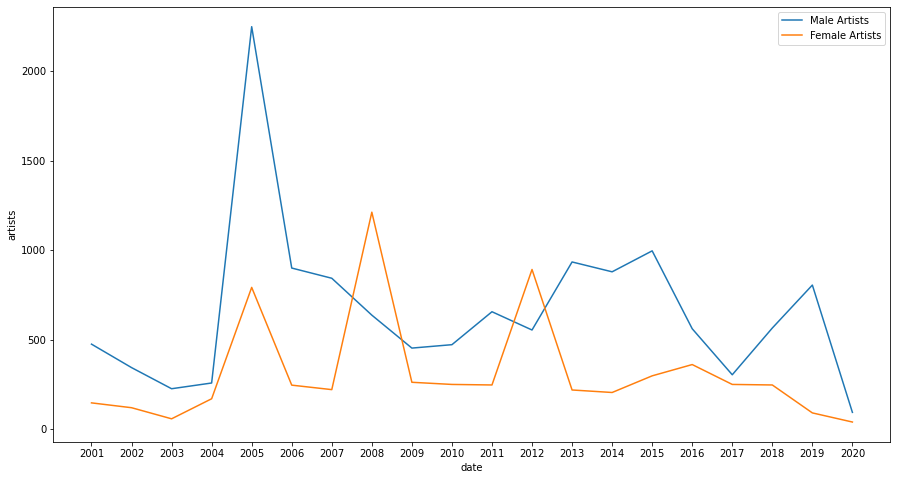

In [44]:
#dual line plot w/ cat variable over time (gender, date acquired), one database 

plots = dict(date=moma_new_gender_artworks['Date Acquired'][20:40], artists=moma_new_gender_artworks['Male Artists'][20:40], artists_2=moma_new_gender_artworks['Female Artists'][20:40])
data = pd.DataFrame(plots)
fig, ax = plt.subplots(figsize=(15,8))
ax= sns.lineplot(x='date', y='artists', data=data, label='Male Artists')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax1 = sns.lineplot(x='date', y='artists_2', data=data, label='Female Artists')

Text(0, 0.5, 'y2')

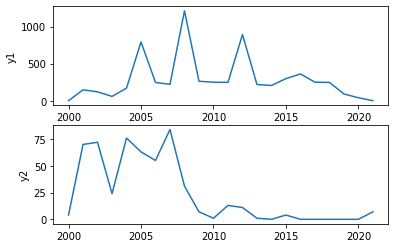

In [167]:
#FEMALE ARTISTS ACQUISITION comparison across datasets, over time (date acquired)

moma_new_gender_artworks_2 = moma_new_gender_artworks.drop('Male Artists', axis=1)
moma_new_gender_artworks_2 = moma_new_gender_artworks_2[20:40]
rhizome_gender_artworks_2 = rhizome_gender_artworks.drop('Male Artists', axis=1)
female_acquired = pd.merge(moma_new_gender_artworks_2, rhizome_gender_artworks_2, on='Date Acquired', how='outer')
female_acquired = female_acquired.fillna('0')
female_acquired = female_acquired.astype(int)
female_acquired = female_acquired.sort_values(by='Date Acquired')

x = female_acquired['Date Acquired']
y1 = female_acquired['Female Artists_x']
y2 = female_acquired['Female Artists_y']
f, axes = plt.subplots(2, 1)
axes[0].plot(x, y1)
axes[0].set_ylabel('y1')

axes[1].plot(x, y2)
axes[1].set_ylabel('y2')

In [ ]:
#cat variable (gender), across two dbs w/ sampling 

moma_genders = moma_artists['Gender']
moma_artists_2 = moma_artists.sample(n=1301)
rhz_artists_copy = rhz_artists.copy()
real_gender = rhz_artists_copy['Gender']
guessed_gender = rhz_artists_copy['genderGuessed']
genders = [real_gender, guessed_gender]
rhz_artists_copy['Gender_2'] = pd.concat(genders, axis=1)
moma_artists['Source'] = 'MOMA'
rhz_artists['Source'] = 'Rhizome'
moma = moma_artists[['Gender', 'Source']]
rhizome = rhz_artists[['Gender', 'Source']]
frames = [moma, rhizome]
combined = pd.concat(frames, axis=0)
combined = combined.reset_index(drop=True)
moma_artists_2['Source'] = 'MOMA'
moma_2 = moma_artists_2[['Gender', 'Source']]
frames_2 = [moma_2, rhizome]
combined_2 = pd.concat(frames_2, axis=0)
combined_2 = combined_2.reset_index(drop=True)

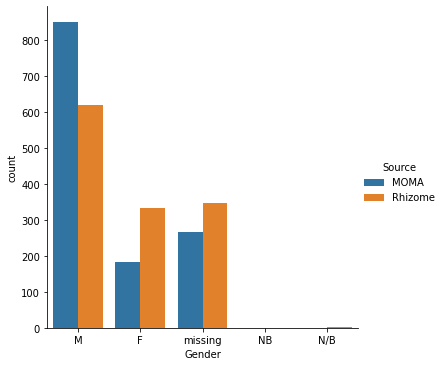

In [25]:
sns.catplot(x='Gender', kind='count', hue='Source', data=combined_2, order=['M', 'F', 'missing', 'NB', 'N/B'])

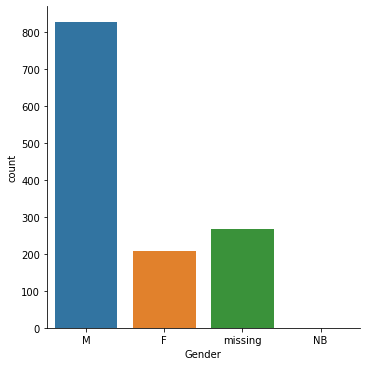

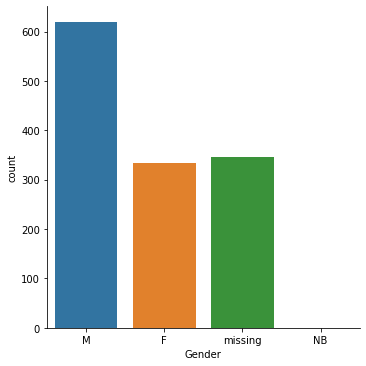

In [43]:
sns.catplot(x='Gender', kind='count', data=moma_artists_2, order=['M', 'F', 'missing', 'NB'])
sns.catplot(x='Gender', kind='count', data=rhz_artists, order=['M', 'F', 'missing', 'NB'])

In [88]:
moma_artworks_new

,Title,Artist,ID,DateCreated,Medium,Department,DateAcquired,URL,ThumbnailURL,Nationality,Gender
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,1987,Paint and colored pencil on print,Architecture & Design,1995-01-17,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,French,M
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995-01-17,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,missing,M
31,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995-01-17,http://www.moma.org/collection/works/33,http://www.moma.org/media/W1siZiIsIjIwMCJdLFsi...,missing,M
35,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Photographic reproduction with colored synthet...,Architecture & Design,1995-01-17,http://www.moma.org/collection/works/38,http://www.moma.org/media/W1siZiIsIjI2NyJdLFsi...,missing,M
40,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1980,Ink on tracing paper,Architecture & Design,1995-01-17,http://www.moma.org/collection/works/44,http://www.moma.org/media/W1siZiIsIjI5NiJdLFsi...,missing,M
...,...,...,...,...,...,...,...,...,...,...,...
138114,Cóctel (Cocktail),Alejandro Kuropatwa,132939,1996,Chromogenic color print,Photography,2020-10-07,missing,missing,Argentine,missing
138115,Cóctel (Cocktail),Alejandro Kuropatwa,132939,1996,Chromogenic color print,Photography,2020-10-07,missing,missing,Argentine,missing
138116,Cóctel (Cocktail),Alejandro Kuropatwa,132939,1996,Chromogenic color print,Photography,2020-10-07,missing,missing,Argentine,missing
138117,Cóctel (Cocktail),Alejandro Kuropatwa,132939,1996,Chromogenic color print,Photography,2020-10-07,missing,missing,Argentine,missing


In [161]:
moma_photo = moma_artworks_new[moma_artworks_new['Department'] == 'Photography']
moma_medium_male = moma_photo.loc[moma_photo['Gender'] == 'M']
moma_medium_male = moma_medium_male['Medium'].value_counts().rename_axis('Medium').reset_index(name='Male Artists')
moma_medium_female = moma_photo.loc[moma_photo['Gender'] == 'F']
moma_medium_female = moma_medium_female['Medium'].value_counts().rename_axis('Medium').reset_index(name='Female Artists')
moma_medium_pyramid = pd.merge(moma_medium_male, moma_medium_female, on='Medium', how='outer')
moma_medium_pyramid = moma_medium_pyramid.fillna('0')
moma_medium_pyramid['Male Artists'] = moma_medium_pyramid['Male Artists'].astype(int)
moma_medium_pyramid['Female Artists'] = moma_medium_pyramid['Female Artists'].astype(int)
moma_medium_pyramid = moma_medium_pyramid.reset_index(drop=True)
moma_medium_pyramid = moma_medium_pyramid.set_index('Medium')
moma_medium_pyramid

,Male Artists,Female Artists
Medium,,
Gelatin silver print,1806,254
Chromogenic color print,648,310
Pigmented inkjet print,279,171
Page with chromogenic color print and text,125,0
Silver dye bleach print,66,39
...,...,...
Chromogenic color print (Digital exposure to Fujiflex paper),0,1
Four pigmented inkjet prints,0,1
"Silver dye bleach print, printed 2009",0,1


In [163]:
moma_medium_pyramid = moma_medium_pyramid[moma_medium_pyramid['Male Artists'] > 1]
moma_medium_pyramid = moma_medium_pyramid[moma_medium_pyramid['Female Artists'] > 1]
moma_medium_pyramid

,Male Artists,Female Artists
Medium,,
Gelatin silver print,1806,254
Chromogenic color print,648,310
Pigmented inkjet print,279,171
Silver dye bleach print,66,39
Pigmented inkjet prints,49,6
Color instant print (Polaroid),27,4
"Gelatin silver print, printed 1996",17,3
Gelatin silver prints,16,8
"Gelatin silver print, printed 2016",10,3


In [164]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = moma_medium_pyramid.index
column0 = moma_medium_pyramid['Male Artists']
column1 = moma_medium_pyramid['Female Artists']
title0 = 'Male Artists'
title1 = 'Female Artists'

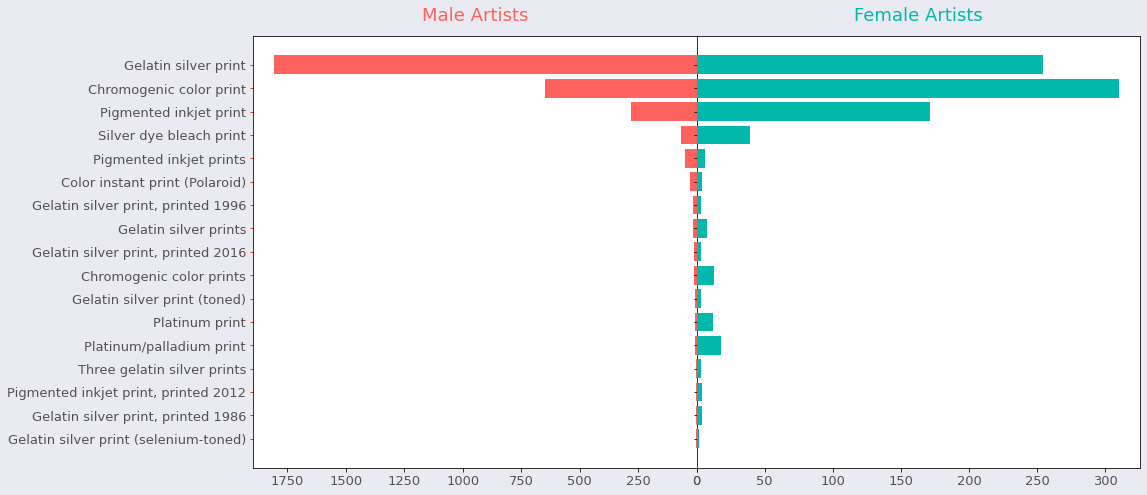

In [165]:
fig, axes = plt.subplots(figsize=(16,8), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(index, column0, align='center', color=color_red, zorder=30)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=30)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 
# To show data from highest to lowest
plt.gca().invert_yaxis()
axes[0].set(yticks=moma_medium_pyramid.index, yticklabels=moma_medium_pyramid.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='red') # tick color
#axes[1].set_xticks([0, 100, 200, 300, 400])
for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)